**Aim:**
To anaylize a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

**Tasks:** 

-Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.

-Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

-Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

-The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy.stats import linregress
%matplotlib inline

In [2]:
data=pd.read_csv('sea_level.csv')
data

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


**Scatter Plot**

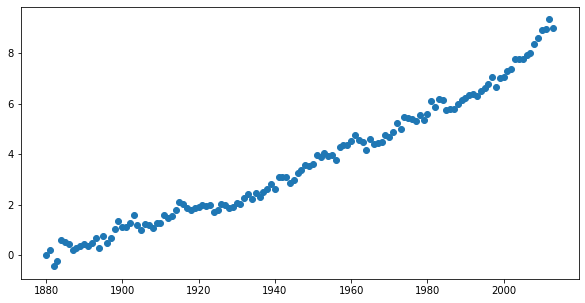

In [3]:
fig,ax=plt.subplots(figsize=(10,5))
ax.scatter(data['Year'],data["CSIRO Adjusted Sea Level"])

In [4]:
val=linregress(data['Year'],data["CSIRO Adjusted Sea Level"])
val

LinregressResult(slope=0.06304458401213482, intercept=-119.06594196773983, rvalue=0.984757131182585, pvalue=3.788696979113155e-102, stderr=0.0009692118713287152, intercept_stderr=1.886943381242523)

In [5]:
m = val.slope
c = val.intercept
m,c

(0.06304458401213482, -119.06594196773983)

**Extending plot range to 2050**

In [6]:
x=range(1880,2050)
y=m*x+c

**Plotting the Line of Best Fit till 2050**

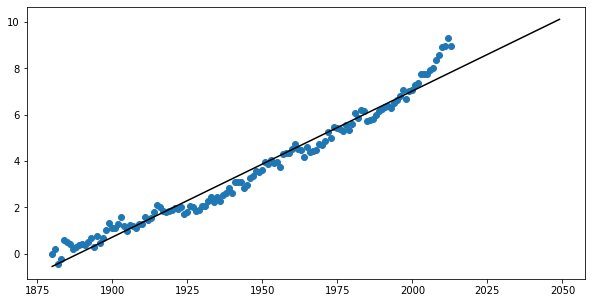

In [7]:
ax.plot(x,y,color='black')
fig

**Creating a new line of best fit from Data after 2000**

In [8]:
new_data=data[data['Year']>=2000]
new_data

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933
125,2005,7.744094,7.472441,8.015748,7.644563
126,2006,7.917323,7.645669,8.188976,7.697420
127,2007,7.996063,7.712598,8.279528,7.702147
128,2008,8.350394,8.078740,8.622047,7.907365
129,2009,8.586614,8.311024,8.862205,8.046354


In [10]:
new=linregress(new_data['Year'],new_data['CSIRO Adjusted Sea Level'])
new

LinregressResult(slope=0.1664272733318682, intercept=-325.7934668059649, rvalue=0.9762875716140618, pvalue=2.4388064141618245e-09, stderr=0.010652933111541163, intercept_stderr=21.375153425608215)

In [11]:
new_m=new.slope
new_c=new.intercept
new_m,new_c

(0.1664272733318682, -325.7934668059649)

In [15]:
new_x=range(2000,2050)
new_y=new_m*new_x+new_c

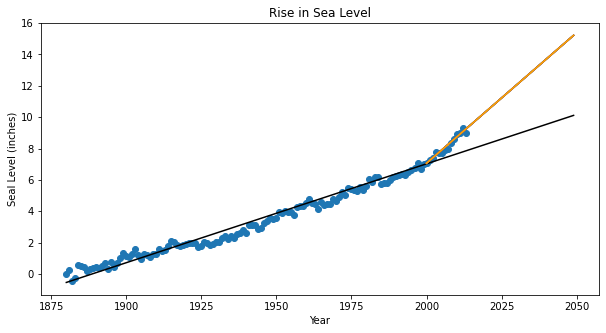

In [20]:
ax.plot(new_x,new_y,color='orange')
ax.set_xlabel('Year')
ax.set_ylabel('Seal Level (inches)')
ax.set_title("Rise in Sea Level")
fig

In [21]:
fig.savefig('sea_level_plot.png')